In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### Step 1: Data Preparation


In [8]:
# Create DataFrame
data = pd.read_excel("IMB469-XLS-ENG (2).xlsx")

In [9]:
data.head()

,Income,Credit_Score,Loan_Amount,Loan_Term,Years_of_Employment,Marital_Status,Loan_Approval
0,141958,760,39525,56,22,Single,1
1,35795,846,33556,14,18,Married,1
2,20860,552,13595,38,14,Single,0
3,123694,689,2969,54,10,Married,0
4,148106,555,44753,51,14,Single,1


In [10]:
# Split dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

### Step 2: Feature Scaling


In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on numeric features
train_data_scaled = train_data.copy()
numeric_features = [
    "Income",
    "Credit_Score",
    "Loan_Amount",
    "Loan_Term",
    "Years_of_Employment",
]
train_data_scaled[numeric_features] = scaler.fit_transform(train_data[numeric_features])

In [12]:
# Fit and transform the scaler on numeric features
test_data_scaled = test_data.copy()
numeric_features = [
    "Income",
    "Credit_Score",
    "Loan_Amount",
    "Loan_Term",
    "Years_of_Employment",
]
test_data_scaled[numeric_features] = scaler.fit_transform(test_data[numeric_features])

In [13]:
# Convert categorical features to one-hot encoded columns
train_data_encoded = pd.get_dummies(train_data_scaled, columns=["Marital_Status"])

# Separate features and target variable
X_train = train_data_encoded.drop(["Loan_Approval", "Marital_Status_Single"], axis=1)
y_train = train_data_encoded["Loan_Approval"]

In [14]:
# Convert categorical features to one-hot encoded columns
test_data_encoded = pd.get_dummies(test_data_scaled, columns=["Marital_Status"])

# Prepare test data
X_test = test_data_encoded.drop(["Loan_Approval", "Marital_Status_Single"], axis=1)
y_test = test_data_encoded["Loan_Approval"]

### Step 3: Model Training


In [15]:
X_train.head()

,Income,Credit_Score,Loan_Amount,Loan_Term,Years_of_Employment,Marital_Status_Married
29,0.977730,-1.487981,1.304871,0.336332,0.059967,True
535,-0.295112,0.339359,-0.493501,0.190458,-1.468600,False
695,1.157657,0.556162,-1.433088,1.138643,1.588534,False
557,0.656370,-0.781822,-0.840020,-1.414163,-1.351018,True
836,-0.142760,-1.060569,0.937733,1.430392,-0.645526,True


In [16]:
y_train

29     0
535    1
695    0
557    1
836    0
      ..
106    1
270    0
860    0
435    0
102    0
Name: Loan_Approval, Length: 800, dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Initialize models
logreg_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC()

# Train models
logreg_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC()

### Step 4: Model Evaluation


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
logreg_pred = logreg_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Evaluate models
logreg_accuracy = accuracy_score(y_test, logreg_pred)
tree_accuracy = accuracy_score(y_test, tree_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

logreg_precision = precision_score(y_test, logreg_pred)
tree_precision = precision_score(y_test, tree_pred)
rf_precision = precision_score(y_test, rf_pred)
svm_precision = precision_score(y_test, svm_pred)

logreg_recall = recall_score(y_test, logreg_pred)
tree_recall = recall_score(y_test, tree_pred)
rf_recall = recall_score(y_test, rf_pred)
svm_recall = recall_score(y_test, svm_pred)

logreg_f1 = f1_score(y_test, logreg_pred)
tree_f1 = f1_score(y_test, tree_pred)
rf_f1 = f1_score(y_test, rf_pred)
svm_f1 = f1_score(y_test, svm_pred)

In [19]:
print(
    f"logreg_accuracy: {logreg_accuracy}, tree_accuracy: {tree_accuracy}, rf_accuracy: {rf_accuracy}, svm_accuracy: {svm_accuracy}"
)

logreg_accuracy: 0.46, tree_accuracy: 0.54, rf_accuracy: 0.53, svm_accuracy: 0.5


### Step 5: Interpretability

Explain the decision rules forthe models using their .feature*importances* and .coef\_ attributes.


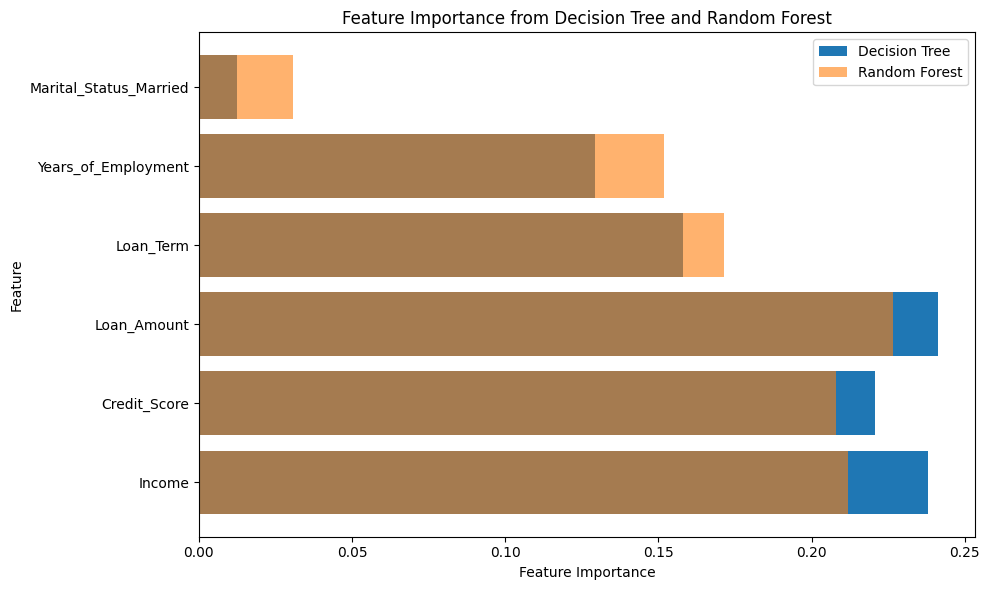

In [20]:
import matplotlib.pyplot as plt

# Get feature importances from the models
tree_feature_importances = tree_model.feature_importances_
rf_feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(
    range(len(feature_names)),
    tree_feature_importances,
    align="center",
    label="Decision Tree",
)
plt.barh(
    range(len(feature_names)),
    rf_feature_importances,
    align="center",
    label="Random Forest",
    alpha=0.6,
)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Decision Tree and Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

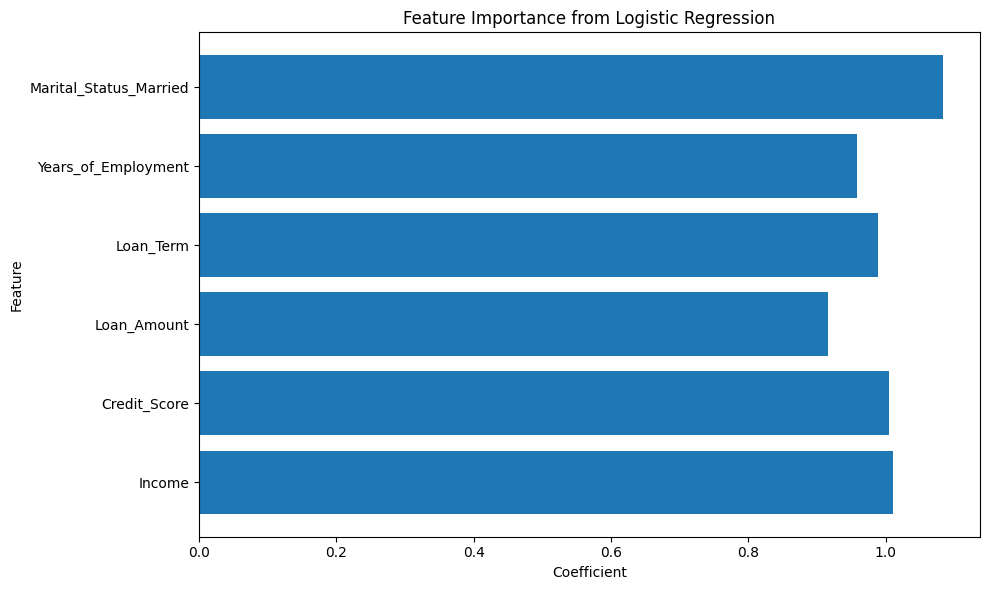

In [21]:
# Get absolute coefficients from the logistic regression model
logreg_coeffs = np.exp(logreg_model.coef_[0])

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), logreg_coeffs, align="center")
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance from Logistic Regression")
plt.tight_layout()
plt.show()

### Step 6: Parameter Tuning

You can use techniques like grid search or random search to find optimal hyperparameters for each algorithm


Parameter tuning is a crucial step in optimizing the performance of machine learning models. Each algorithm has various parameters that can be adjusted to improve their predictive accuracy and generalization. In this step, you search for the best combination of parameter values to achieve the best model performance. Let's go through an explanation and example for each algorithm.


1. Logistic Regression:

For logistic regression, one common parameter is the regularization strength (C). A smaller C increases the regularization, which can prevent overfitting.


In [22]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {"C": [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="accuracy")

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameter
best_C = grid_search.best_params_["C"]

# Train a Logistic Regression model with the best parameter
best_logreg_model = LogisticRegression(C=best_C)
best_logreg_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

2. Decision Trees:

For decision trees, an important parameter is the maximum depth of the tree (max_depth). A deeper tree can lead to overfitting, so you need to find an optimal value for this parameter.


In [23]:
param_grid = {"max_depth": [None, 5, 10, 15, 20]}

grid_search = GridSearchCV(
    DecisionTreeClassifier(), param_grid, cv=5, scoring="accuracy"
)

grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_["max_depth"]

best_tree_model = DecisionTreeClassifier(max_depth=best_max_depth)
best_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

3. Random Forest:

Random Forests have parameters like the number of trees (n_estimators) and the maximum depth of each tree (max_depth). Tuning these parameters can improve the performance of the ensemble.


In [24]:
param_grid = {"n_estimators": [50, 100, 150], "max_depth": [None, 10, 20]}

grid_search = GridSearchCV(
    RandomForestClassifier(), param_grid, cv=5, scoring="accuracy"
)

grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_["n_estimators"]
best_max_depth = grid_search.best_params_["max_depth"]

best_rf_model = RandomForestClassifier(
    n_estimators=best_n_estimators, max_depth=best_max_depth
)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

4. Support Vector Machines (SVM):

For SVMs, parameters like the regularization parameter (C) and the choice of kernel (kernel) are important to tune. The kernel can be linear, polynomial, or radial basis function (RBF).


In [25]:
param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "poly", "rbf"]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy")

grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_["C"]
best_kernel = grid_search.best_params_["kernel"]

best_svm_model = SVC(C=best_C, kernel=best_kernel)
best_svm_model.fit(X_train, y_train)

SVC(C=0.1)

In each example, we're using GridSearchCV to perform a grid search over the specified parameter values. The cv parameter indicates the number of folds in cross-validation, and scoring specifies the evaluation metric. After finding the best parameter combination, a new model is trained using the best parameters.

Remember that these are simplified examples, and you can explore more parameters and values to fine-tune your models further. Also, be mindful of the computational cost of exhaustive grid searches, as they can become time-consuming with larger datasets or complex models.


## Step 7: Conclusion

Summarize the results based on accuracy, precision, recall, and F1-score metrics and discuss which algorithm might be the most suitable for this loan approval prediction problem.
